In [476]:
import pickle
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [486]:
with open('../../Downloads/regret_case_one_sanitythree_person_dict.pkl','rb') as f:
    pooled = pickle.load(f) 

In [477]:
with open('../../Downloads/regret_None818twoshortmajsmall.pkl','rb') as f:
    t = pickle.load(f)

In [463]:
with open('../../Downloads/personalized_sanitytwo_regret_check.pkl','rb') as f:
    personalized = pickle.load(f) 

In [464]:
with open('../../Downloads/batch_sanitytwo_regret_check_caseone.pkl','rb') as f:
    batch = pickle.load(f) 

In [438]:
def merge(p):
    to_return={}
    for time,dicts in p.items():
        for person,sims in dicts.items():
            if person not in to_return:
                to_return[person]={}
            for sim,r in sims.items():
                if sim not in to_return[person]:
                    to_return[person][sim]=[]
                to_return[person][sim].append(r)
                
    for person in to_return:
        for sim in to_return[person]:
            to_return[person][sim]=sum(to_return[person][sim])
    #to_return[person][sim]=sum(to_return[person][sim])
    return to_return

In [487]:
nprob = merge(pooled)

In [490]:
nprob = merge(t['case_one']['or'])

In [466]:
nper = merge(personalized)

In [467]:
nbat = merge(batch)

In [391]:
def test_idea(pooled):
    
    to_return = {}
    for time,pooled_time in pooled.items():
        temp = {}
        for person in range(32):
            new_dict = {}
            for i in range(50):
                if person in pooled_time:
                    if i in pooled_time[person]:
                        new_dict[i]=pooled_time[person][i]
                        new_dict[i+50]=0
                        new_dict[i+100]=0
                temp[person]=new_dict
        to_return[time]=temp
    return to_return

In [392]:
pooled[pd.Timestamp('2015-07-27 10:00:00')].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 17, 18, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31])

In [349]:
test = test_idea(pooled)

In [368]:
#d =pooled[pd.Timestamp('2015-10-16 19:00:00')]
#alls = []
#for k,v in d.items():
    #print(k)
    #print(v)
    #
    #mymean = np.array(list(v.values())).mean()
    #print(mymean)
    #print(sum([(r-mymean)**2 for r in list(v.values())]))
    #alls.extend(list(v.values()))

In [149]:
np.array(all_averages).std()

0.06722235984600143

In [187]:
 np.array([np.array(list(pooled[pd.Timestamp('2015-08-27 10:00:00')][i].values())).std() for i in pooled[pd.Timestamp('2015-08-27 10:00:00')].keys()]).mean()

0.05249286458231495

In [27]:
with open('../distributions_rl4rl/time_to_active_participants_pop_32_short_staggered_12.pkl','rb') as f:
    act = pickle.load(f)

In [307]:
def get_ssw_one_time(a_dict):
    
    temp = []
    for person,sim in a_dict.items():
        #print(sim)
        #print(sim.keys())
        #print(list(sim.values()))
        my_average = np.array(list(sim.values())).mean()
        
        t = [(r-my_average)**2 for r in list([abs(r) for r in sim.values()])]
        temp.append(sum(t))
    #print(temp)        
    return sum(temp)
    

In [457]:
def get_ssb_one_time(a_dict):
    
    alls = []
    
    for person,sim in a_dict.items():
        t = [r for r in list(sim.values())]
        alls.extend(t)
    global_mean = np.array(alls).mean()
    temp = []
    for person,sim in a_dict.items():
        
        my_average = np.array(list([abs(r) for r in sim.values()])).mean()
        temp.append(50*(my_average-global_mean)**2)
        
    return sum(temp)
        
        

In [458]:
def get_sst_one_time(a_dict):
    
    alls = []
    
    for person,sim in a_dict.items():
        #t = [r for r in list(sim.values())]
        alls.extend(sim.values())
    global_mean = np.array(alls).mean()
    temp = []
    for person,sim in a_dict.items():
        
        my_average = [(r-global_mean)**2 for r in list([abs(r) for r in sim.values()])]
        temp.append(sum(my_average))
    return sum(temp)
        

In [468]:
ssw = get_ssw_one_time(nbat)

ssb =  get_ssb_one_time(nbat)
sst =  get_sst_one_time(nbat)
print(ssw+ssb)
print(sst)
print(ssw)
print(ssb)
print(ssw/sst)

14275.77824375001
14275.77824375001
12750.775300000012
1525.002943749998
0.8931754950440163


In [489]:
nprob.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 13, 12, 15, 16, 17, 18, 19, 21, 22, 23, 20, 25, 26, 27, 24, 28, 29, 30, 31])

In [485]:
t['case_one']['or'].keys()

dict_keys([Timestamp('2015-07-27 10:00:00'), Timestamp('2015-07-27 13:00:00'), Timestamp('2015-07-27 17:00:00'), Timestamp('2015-07-28 10:00:00'), Timestamp('2015-07-28 13:00:00'), Timestamp('2015-07-28 15:00:00'), Timestamp('2015-07-28 17:00:00'), Timestamp('2015-07-28 19:00:00'), Timestamp('2015-07-29 10:00:00'), Timestamp('2015-07-29 13:00:00'), Timestamp('2015-07-29 15:00:00'), Timestamp('2015-07-29 17:00:00'), Timestamp('2015-07-29 19:00:00'), Timestamp('2015-07-30 10:00:00'), Timestamp('2015-07-30 15:00:00'), Timestamp('2015-07-30 17:00:00'), Timestamp('2015-07-31 10:00:00'), Timestamp('2015-07-31 13:00:00'), Timestamp('2015-07-31 17:00:00'), Timestamp('2015-07-31 19:00:00'), Timestamp('2015-08-01 13:00:00'), Timestamp('2015-08-01 15:00:00'), Timestamp('2015-08-01 17:00:00'), Timestamp('2015-08-01 19:00:00'), Timestamp('2015-08-02 10:00:00'), Timestamp('2015-08-02 13:00:00'), Timestamp('2015-08-02 15:00:00'), Timestamp('2015-08-02 17:00:00'), Timestamp('2015-08-02 19:00:00'), Tim

In [491]:
ssw = get_ssw_one_time(nprob)

ssb =  get_ssb_one_time(nprob)
sst =  get_sst_one_time(nprob)
print(ssw+ssb)
print(sst)
print(ssw)
print(ssb)
print(ssw/sst)

7176.560273437509
7176.560273437506
5155.719050000007
2020.8412234375019
0.7184108895570476


In [470]:
ssw = get_ssw_one_time(nper)

ssb =  get_ssb_one_time(nper)
sst =  get_sst_one_time(nper)
print(ssw+ssb)
print(sst)
print(ssw)
print(ssb)
print(ssw/sst)

66549.35349843734
66549.35349843734
62480.75784999985
4068.5956484374897
0.9388634834967551


In [343]:
test[pd.Timestamp('2015-07-27 10:00:00')]

{0: {0: 0.45,
  50: 0.45,
  100: 0.45,
  1: 0.0,
  51: 0.0,
  101: 0.0,
  2: 0.45,
  52: 0.45,
  102: 0.45,
  3: 0.45,
  53: 0.45,
  103: 0.45,
  4: 0.0,
  54: 0.0,
  104: 0.0,
  5: 0.0,
  55: 0.0,
  105: 0.0,
  6: 0.0,
  56: 0.0,
  106: 0.0,
  7: 0.0,
  57: 0.0,
  107: 0.0,
  8: 0.0,
  58: 0.0,
  108: 0.0,
  9: 0.0,
  59: 0.0,
  109: 0.0,
  10: 0.45,
  60: 0.45,
  110: 0.45,
  11: 0.45,
  61: 0.45,
  111: 0.45,
  12: 0.45,
  62: 0.45,
  112: 0.45,
  13: 0.45,
  63: 0.45,
  113: 0.45,
  14: 0.45,
  64: 0.45,
  114: 0.45,
  15: 0.0,
  65: 0.0,
  115: 0.0,
  16: 0.45,
  66: 0.45,
  116: 0.45,
  17: 0.45,
  67: 0.45,
  117: 0.45,
  18: 0.0,
  68: 0.0,
  118: 0.0,
  19: 0.45,
  69: 0.45,
  119: 0.45,
  20: 0.0,
  70: 0.0,
  120: 0.0,
  21: 0.45,
  71: 0.45,
  121: 0.45,
  22: 0.0,
  72: 0.0,
  122: 0.0,
  23: 0.45,
  73: 0.45,
  123: 0.45,
  24: 0.45,
  74: 0.45,
  124: 0.45,
  25: 0.0,
  75: 0.0,
  125: 0.0,
  26: 0.0,
  76: 0.0,
  126: 0.0,
  27: 0.45,
  77: 0.45,
  127: 0.45,
  28: 0.0,

In [246]:
44.592542857142845/32

1.393516964285714

In [247]:
pooled[pd.Timestamp('2015-10-15 19:00:00')].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31])

In [310]:
def get_all(d):
    times_ssw = {}
    times_ssb = {}
    times_sst = {}
    for time in d.keys():
        times_ssw[time]=get_ssw_one_time(d[time])
        times_ssb[time]=get_ssb_one_time(d[time])
        times_sst[time]=get_sst_one_time(d[time])
    return times_ssw,times_ssb,times_sst

In [311]:
def get_weekly_averages(points):
    to_return = []
    for i in range(0,len(points),35):
        temp = points[i:i+35]
        to_return.append(np.array(temp).mean())
    return to_return

In [360]:
sswall,ssball,sstall = get_all(personalized)

In [361]:
to_plot = [sswall[t]/(sstall[t]) for t in sorted(sstall.keys())]

In [362]:
ts2 = get_weekly_averages(to_plot)

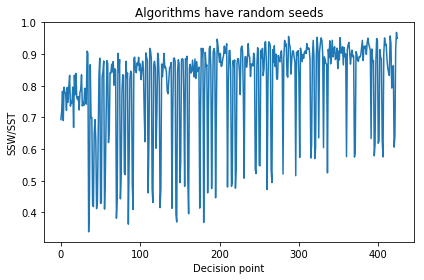

In [379]:
sswall,ssball,sstall = get_all(personalized)
to_plot = [sswall[t]/(sstall[t]) for t in sorted(sstall.keys())]
ts2 = get_weekly_averages(to_plot)
plt.plot(to_plot)
plt.ylabel('SSW/SST')
plt.xlabel('Decision point')
plt.title('Algorithms have random seeds')
plt.tight_layout()
#plt.savefig('between study variance (SSG) over total measure of variability (SST) algorithm random seeds')


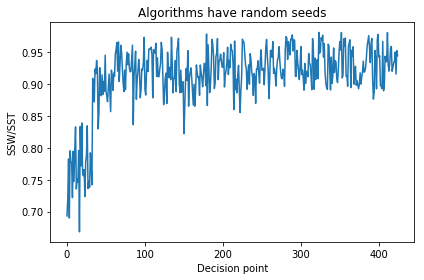

In [380]:
sswall,ssball,sstall = get_all(pooled)
to_plot = [sswall[t]/(sstall[t]) for t in sorted(sstall.keys())]
ts2 = get_weekly_averages(to_plot)
plt.plot(to_plot)
plt.ylabel('SSW/SST')
plt.xlabel('Decision point')
plt.title('Algorithms have random seeds')
plt.tight_layout()
#plt.savefig('between study variance (SSG) over total measure of variability (SST) algorithm random seeds')
